In [91]:
using Distributions
using PyPlot
plt = PyPlot

PyPlot

In [301]:
function iterativeLegendreArray(Qf, x)
    if Qf == 0
        return [1]
    elseif Qf == 1
        return [1 x]
    else
        L = ones(Qf + 1)
        L[1] = 1
        L[2] = x
        for i = 3:Qf + 1
            L[i] = ( (2 * i - 1) / i) * x * L[i-1] - ((i - 1) / i) * L[i-2]
        end
        
        return L
    end
end

iterativeLegendreArray (generic function with 1 method)

In [302]:
function createTargetFunctionCoefficients(Qf)
    a_rand = rand(Qf + 1)
    coefSum = sum([a_rand[q]^2/(2 * q + 1) for q in 1:(Qf + 1)])
    a = a_rand / sqrt(2 * coefSum)
    return a
    
end

function targetFunction(x, a, Qf)
    sum = 0
    L = iterativeLegendreArray(Qf, x)
    for q = 1:Qf + 1
        sum += a[q] * L[q]
    end

    return sum 
end

targetFunction (generic function with 1 method)

In [303]:
function createDatabase(N, a, Qf, sigma)
    X = sort(2 * rand(N) - 1)
    Y = zeros(N)
    for n=1:N
        Fx = targetFunction(X[n], a, Qf)
        Y[n] = Fx + sqrt(sigma) * (randn() * 1.1)
    end
    return X, Y
end

createDatabase (generic function with 3 methods)

In [304]:
function H2(X, Y)
    N = size(X, 1)
    Z2 = zeros(N, 3)
    for i=1:N
        Z2[i,:] = iterativeLegendreArray(2, X[i])
    end
    w = pinv(Z2) * Y
    return w
end

function H10(X, Y)
    N = size(X, 1)
    Z10 = zeros(N, 11)
    for i=1:N
        Z10[i,:] = iterativeLegendreArray(10, X[i])
    end
    w = pinv(Z10) * Y
end

H10 (generic function with 1 method)

In [305]:
function Eout(a, w)
    Qf = length(a)
    h = length(w)
    if Qf > h
        w = vcat(w, zeros(Qf - h))
    elseif Qf < h
        a = vcat(a, zeros(h - Qf))
    end
    c = 2 * 1:max(h, Qf) + 1
    err = (((a - w).^2 ) ./ (c))
    return sum(err)
end

Eout (generic function with 1 method)

In [306]:
function measureStochasticNoise(sigma, N, repeats)
    result = 0
    Qf = 20
    for i=1:repeats
        a = createTargetFunctionCoefficients(Qf)
        X, Y = createDatabase(N, a, Qf, sigma)
        w2 = H2(X, Y)
        w10 = H10(X, Y)
        overfitting = Eout(a, w10) - Eout(a, w2)
        result += overfitting
    end
    return result/repeats
end

measureStochasticNoise (generic function with 1 method)

In [318]:
function measureDeterministicNoise(Qf, N, repeats)
    result = 0
    sigma = 0.1
    for i=1:repeats
        a = createTargetFunctionCoefficients(Qf)
        X, Y = createDatabase(N, a, Qf, sigma)
        w2 = H2(X, Y)
        w10 = H10(X, Y)
        overfitting = Eout(a, w10) - Eout(a, w2)
        result += overfitting
    end
    return result/repeats
end

measureDeterministicNoise (generic function with 1 method)

In [ ]:
sigmas = 0.0:0.05:2.0
Ns = 20:5:130
Qfs = 1:2:100 
repeats = 1000

for i=1:100
    stochasticResult = [measureStochasticNoise(sigma, N, repeats) for sigma in sigmas, N in Ns]
    writecsv(string("results/stochastic-", i, ".csv"), stochasticResult)
end


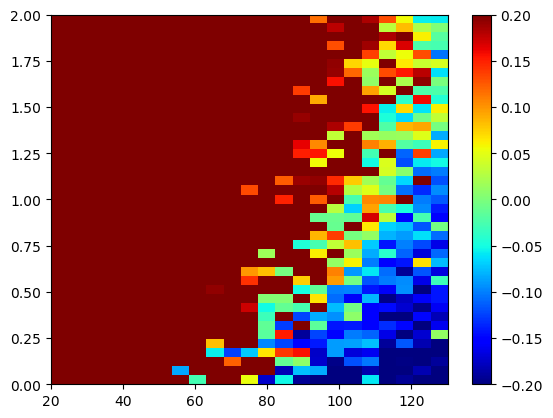

In [316]:
plt.imshow(stochasticResult, cmap="jet", origin="lower", vmin=-0.2, vmax=0.2, extent=[20,130,0.0,2.0], aspect="auto")
plt.colorbar()
plt.show()
plt.savefig("fig1.eps", format="eps")

In [319]:
for i=:1:100
    deterministicResult = [measureDeterministicNoise(Qf, N, repeats) for Qf in Qfs, N in Ns]
    writecsv(string("results/deterministic-", i, ".csv"), deterministicResult)
end

elapsed time: 74.806791323 seconds


74.806791323

In [1]:
plt.imshow(deterministicResult, cmap="jet", origin="lower", vmin=-0.2, vmax=0.2, extent=[20,130,0,100], aspect="auto")
plt.colorbar()
plt.show()
plt.savefig("fig1.eps", format="eps")

LoadError: [91mUndefVarError: plt not defined[39m

"deterministic-1.csv"